In [1]:
# This notebook is used to investigate the differences in PSS/E and ANDES dynamic simulations

In [1]:
"""
Import ANDES packages, need to use ANDES1 conda enviroment
"""
import andes
import numpy as np

%matplotlib inline

In [1]:
"""
This cell is used to import the required libraries and set up the PSSE environment,
this is a bit more complex than it should because of the way I developed WEC-GRID
need to use PSSE conda enviroment
"""

# import PSSE stuff
# Standard Libraries
import os
import sys
import time

# 3rd Party Libraries
import pandas as pd
import cmath
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# local libraries
from WEC_GRID.utilities.util import read_paths
from WEC_GRID.viz.psse_viz import PSSEVisualizer

# Initialize the PATHS dictionary
PATHS = read_paths()
CURR_DIR = os.path.dirname(os.path.abspath('./'))

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
psse_path = PATHS["psse"]
sys.path.extend(
    [
        os.path.join(psse_path, subdir)
        for subdir in ["PSSPY37", "PSSBIN", "PSSLIB", "EXAMPLE"]
    ]
)
os.environ["PATH"] = (
    os.path.join(psse_path, "PSSPY37")
    + ";"
    + os.path.join(psse_path, "PSSBIN")
    + ";"
    + os.path.join(psse_path, "EXAMPLE")
    + ";"
    + os.environ["PATH"]
)

import psse35
psse35.set_minor(3)
import psspy 
import dyntools
psspy.psseinit(50)


_i = psspy.getdefaultint()
_f = psspy.getdefaultreal()
_s = psspy.getdefaultchar()

import matplotlib.pyplot as plt
import numpy as np
import dyntools

"""
Plotting Function for PSS/E
"""
# Function to plot results from the simulation
def plot_simulation_results(output_file, channels):
    chnf_obj = dyntools.CHNF(output_file)
    _, channel_ids, channel_data = chnf_obj.get_data()
    base_frequency = 60.0  # Hz
    
    plt.figure(figsize=(10, 6))
    
    # Assuming channels for generator frequencies are correctly numbered
    
    for ch in channels:
        frequency_deviation = np.array(channel_data[ch])
        time_array = np.array(channel_data['time'])
        actual_frequency = 60.0 * (1 + frequency_deviation)
        
        plt.plot(time_array, actual_frequency, label=f'Channel {ch} Frequency')
    
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title('Generator Frequency Over Time')
    plt.legend()
    plt.grid(True)
    #plt.ylim(59.96, 60.012)  
    plt.show()
    return plt



    Sets PSSE environment to latest minor version among installed versions of PSSE 35.
    Use psse35.set_minor(n) to set PSSE35 minor version (n) to use.
        Example, for PSSE 35.0.x, use this as: psse35.set_minor(0)

 Input error detected at !
 -m ipykernel_launcher --ip=127.0.0.1 --stdin=9016 --control=9014 --hb=9013 "--Session.signature_scheme=\"hmac-sha256\"" "--Session.key=b\"dd1735d8-4d19-408b-9469-2fae945d3c85\"" --shell=9015 "--transport=\"tcp\"" --iopu
                                                                                                          !

 PSS(R)E Xplore Version 35
 Copyright (c) 1976-2024
 Siemens Industry, Inc.,
 Power Technologies International                            (PTI)
 This program is a confidential  unpublished  work  created  and  first
 licensed in 1976.  It is a trade secret which is the property of  PTI.
 All use,  disclosure,  and/or reproduction not specifically authorized
 by  PTI  is prohibited.   This  program is protected  under

In [2]:
"""
Test Case
"""

case_raw_path = "../models/grid_models/andes_IEEE14.raw"
case_dyr_path = "../models/grid_models/andes_IEEE14.dyr"

In [2]:
"""
Lets read in and run Powerflow to compare the results
"""
ss = andes.load(case_raw_path, addfile=case_dyr_path, setup=False)
ss.setup()
ss.PFlow.run()
temp = ss.Bus.as_df()
temp.to_csv("andes_initial_powerflow.csv")

NameError: name 'case_raw_path' is not defined

In [18]:
"""
Import ANDES packages 
"""
import andes
import numpy as np

%matplotlib inline

In [19]:
"""
Test Case
"""

case_raw_path = "../models/grid_models/andes_IEEE14.raw"
case_dyr_path = "../models/grid_models/andes_IEEE14.dyr"

In [20]:
"""
Lets read in and run Powerflow to compare the results
"""
ss = andes.load(case_raw_path, addfile=case_dyr_path, setup=False)
ss.setup()
ss.PFlow.run()
temp = ss.Bus.as_df()
temp.to_csv("andes_initial_powerflow.csv")

In [21]:
ss.GENROU.D.v = [0.01, 0.01, 0.01, 0.01, 0.01]

In [7]:
ss.GENROU.as_df()

,idx,u,name,bus,gen,coi,coi2,Sn,Vn,fn,...,gammaq,xd,xq,xd2,xq1,xq2,Td10,Td20,Tq10,Tq20
uid,,,,,,,,,,,,,,,,,,,,,
0,GENROU_1,1.0,GENROU_1,1,1,None,None,100.0,69.0,60.0,...,1.0,1.8,1.75,0.23,0.8,0.23,6.5,0.06,0.2,0.05
1,GENROU_2,1.0,GENROU_2,2,2,None,None,100.0,69.0,60.0,...,1.0,1.8,1.75,0.28,0.8,0.28,6.5,0.06,0.2,0.05
2,GENROU_3,1.0,GENROU_3,3,3,None,None,100.0,69.0,60.0,...,1.0,1.8,1.75,0.34,0.8,0.34,6.5,0.06,0.2,0.05
3,GENROU_4,1.0,GENROU_4,6,4,None,None,100.0,138.0,60.0,...,1.0,1.8,1.75,0.28,0.8,0.28,6.5,0.06,0.2,0.05
4,GENROU_5,1.0,GENROU_5,8,5,None,None,100.0,69.0,60.0,...,1.0,1.8,1.75,0.34,0.8,0.34,6.5,0.06,0.2,0.05


In [6]:
"""
Lets read in and run Powerflow to compare the results, going to use WEC-GRID to do this
"""
import WEC_GRID as wg  # import the WEC-GRID software
import pandas as pd

WecObj = wg.Wec_grid(case_raw_path)
WecObj.initalize_psse("fnsl")
psse_df = WecObj.psse.dataframe[["Bus", "BASE", "PU", "ANGLE"]]


 Reading IC, SBASE, REV, XFRRAT, NXFRAT, BASFRQ...

 Converting RAW data from PSS(R)E 32 to PSS(R)E 33 format
 Starting processing of Case identification data records
 Finished processing of 3 records for Case identification data
 Starting processing of Bus data records
 Finished processing of 14 records for Bus data
 Starting processing of Load data records
 Finished processing of 11 records for Load data
 Starting processing of Fixed shunt data records
 Finished processing of 0 records for Fixed shunt data
 Starting processing of Generator data records
 Finished processing of 5 records for Generator data
 Starting processing of Branch data records
 Finished processing of 16 records for Branch data
 Starting processing of Transformer data records
 Finished processing of 16 records for 4 Transformer data
 Starting processing of Area data records
 Finished processing of 2 records for Area data
 Starting processing of Two-terminal dc data records
 Finished processing of 0 records for 0 

In [7]:
andes_df = pd.read_csv("andes_initial_powerflow.csv")
andes_df

,uid,idx,u,name,Vn,vmax,vmin,v0,a0,xcoord,ycoord,area,zone,owner
0,0,1,1.0,BUS1,69.0,1.1,0.9,1.03000,0.000000,0,0,1,1,1
1,1,2,1.0,BUS2,69.0,1.1,0.9,1.01970,-0.027981,0,0,1,1,1
2,2,3,1.0,BUS3,69.0,1.1,0.9,1.00042,-0.060097,0,0,1,1,1
3,3,4,1.0,BUS4,69.0,1.1,0.9,0.99858,-0.074721,0,0,1,1,1
4,4,5,1.0,BUS5,69.0,1.1,0.9,1.00443,-0.064315,0,0,1,1,1
5,5,6,1.0,BUS6,138.0,1.1,0.9,0.99871,-0.109998,0,0,2,2,2
6,6,7,1.0,BUS7,138.0,1.1,0.9,1.00682,-0.084285,0,0,2,2,2
7,7,8,1.0,BUS8,69.0,1.1,0.9,1.01895,-0.024339,0,0,2,2,2
8,8,9,1.0,BUS9,138.0,1.1,0.9,1.00193,-0.127502,0,0,2,2,2
9,9,10,1.0,BUS10,138.0,1.1,0.9,0.99351,-0.130202,0,0,2,2,2


In [8]:
psse_df

,Bus,BASE,PU,ANGLE
0,BUS 1,69.0,1.030000,0.000000
1,BUS 2,69.0,1.019732,-0.027993
2,BUS 3,69.0,1.000516,-0.060129
3,BUS 4,69.0,0.998643,-0.074740
4,BUS 5,69.0,1.004482,-0.064333
5,BUS 6,138.0,0.998789,-0.109977
6,BUS 7,138.0,1.006917,-0.084314
7,BUS 8,69.0,1.019064,-0.024405
8,BUS 9,138.0,1.002023,-0.127518
9,BUS 10,138.0,0.993597,-0.130213


In [18]:
combined_df_pu = andes_df[["v0"]].copy()
combined_df_pu["PU"] = psse_df["PU"]
combined_df_pu["abs_difference"] = (andes_df["v0"] - psse_df["PU"]).abs()
combined_df_pu

,v0,PU,abs_difference
0,1.03000,1.030000,2.861023e-08
1,1.01970,1.019732,3.164082e-05
2,1.00042,1.000516,9.629543e-05
3,0.99858,0.998643,6.256382e-05
4,1.00443,1.004482,5.155403e-05
5,0.99871,0.998789,7.889322e-05
6,1.00682,1.006917,9.652298e-05
7,1.01895,1.019064,1.140688e-04
8,1.00193,1.002023,9.274323e-05
9,0.99351,0.993597,8.691143e-05


In [19]:
combined_df_pu = andes_df[["a0"]].copy()
combined_df_pu["ANGLE"] = psse_df["ANGLE"]
combined_df_pu["abs_difference"] = (andes_df["a0"] - psse_df["ANGLE"]).abs()
combined_df_pu

,a0,ANGLE,abs_difference
0,0.000000,0.000000,0.000000
1,-0.027981,-0.027993,0.000012
2,-0.060097,-0.060129,0.000032
3,-0.074721,-0.074740,0.000019
4,-0.064315,-0.064333,0.000017
5,-0.109998,-0.109977,0.000021
6,-0.084285,-0.084314,0.000029
7,-0.024339,-0.024405,0.000067
8,-0.127502,-0.127518,0.000016
9,-0.130202,-0.130213,0.000011


In [20]:
# no significant difference between the two powerflows by looking at PU and ANGLE

In [21]:
# lets run a simple dynamic simulation and compare the results

In [14]:
case_raw_path = "../models/grid_models/andes_IEEE14.raw"
case_dyr_path = "../models/grid_models/andes_IEEE14.dyr"

ss = andes.load(case_raw_path, addfile=case_dyr_path, setup=False)
ss.setup()
ss.PFlow.run()

True

In [15]:
ss.TDS.init()
andes.utils.snapshot.save_ss("ieee14_snapshot.pkl", ss)

'ieee14_snapshot.pkl'

In [16]:
ss = andes.utils.snapshot.load_ss("ieee14_snapshot.pkl")

In [17]:
ss.add("Fault", dict(bus=2, tf=1.0, tc=1.2))

ss.setup()  # no `ss.add()` calls are allowed after setup()

ss.PFlow.config.method = "NR"

# ss.PFlow.run()
ss.TDS.config.tf = 7
ss.TDS.config.no_tqdm = 0
ss.TDS.set_method = "trapezoid"
ss.TDS.config.method = "trapezoid"
ss.TDS.config.honest = 1
ss.TDS.config.qrt = 1
ss.TDS.config.refresh_event = 1
ss.TDS.config.linsolve = 1
ss.TDS.tstep = 0.001

ss.TDS.run()

NotImplementedError: Adding devices are not allowed after setup.

In [17]:
# ss = andes.load(case_raw_path, addfile=case_dyr_path, setup=False)
case_raw_path = "../models/grid_models/andes_IEEE14.raw"
case_dyr_path = "../models/grid_models/andes_IEEE14.dyr"

ss = andes.load(case_raw_path, addfile=case_dyr_path, codegen=False, setup=False)


ss.add("Fault", dict(bus=2, tf=1.0, tc=1.2))

ss.setup()  # no `ss.add()` calls are allowed after setup()
ss.GENROU.D.v = [0.1, 0.1, 0.1, 0.01, 0.1]
# ss.TDS.init()
# andes.utils.snapshot.save_ss("ieee14_snapshot.pkl", ss)

# ss = andes.utils.snapshot.load_ss("ieee14_snapshot.pkl")

# ss.TGOV1.VMAX = 1.2
# ss.TGOV1.VMIN = 0
ss.PFlow.config.method = "NR"

ss.PFlow.run()

ss.TDS.config.tf = 7
ss.TDS.config.no_tqdm = 0
ss.TDS.set_method = "trapezoid"
ss.TDS.config.method = "trapezoid"
ss.TDS.config.honest = 1
ss.TDS.config.qrt = 1
ss.TDS.config.refresh_event = 1
ss.TDS.config.linsolve = 1
ss.TDS.tstep = 0.001

ss.TDS.run()

f_update failed. Have you run `andes prepare -i` after updating?


TypeError: bad operand type for unary -: 'list'

In [13]:
ss.GENROU.D

NumParam: GENROU.D, v=[0.01 0.01 0.01 0.01 0.01], vin=[0.01 0.01 0.01 0.01 0.01]

In [ ]:
ss.GENROU.D = 0.1

In [23]:
ss.TDS.plotter.find("omega")[0]

[6, 7, 8, 9, 10]

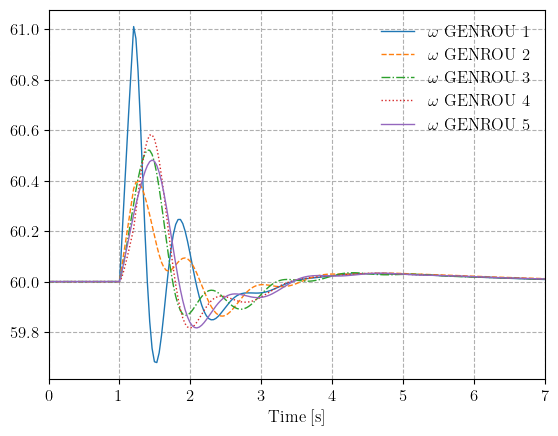

In [16]:
fig, ax = ss.TDS.plotter.plot(
    ss.TDS.plotter.find("omega")[0],
    ycalc=lambda x: 60 * x,
    greyscale=True,
    grid=True,
    set_ylim=True,
)

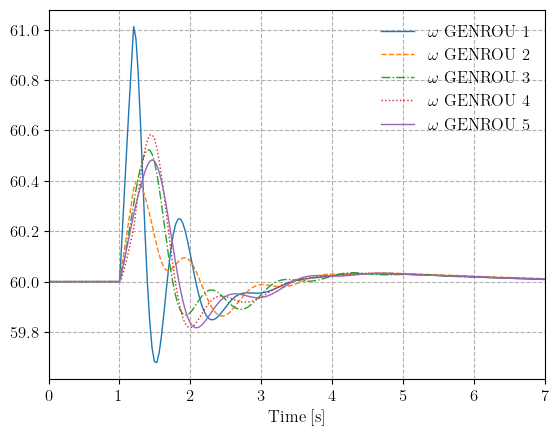

In [13]:
fig, ax = ss.TDS.plotter.plot(
    ss.TDS.plotter.find("omega")[0],
    ycalc=lambda x: 60 * x,
    greyscale=True,
    grid=True,
    set_ylim=True,
)

In [18]:
import pandas as pd

# Use the provided method to get timestamps
timestamps = ss.TDS.plotter.t

# Assuming andes_gen_data is your generator data extracted with ss.TDS.plotter.get_values()
andes_gen_data = ss.TDS.plotter.get_values(ss.TDS.plotter.find("omega")[0])
# andes_gen_data = ss.TDS.plotter.get_values(ss.TDS.plotter.find('BusFreq')[0])

# Ensure the length of andes_gen_data and timestamps match
assert len(andes_gen_data) == len(timestamps), "Data and timestamps length mismatch."

# Preparing column names for generators
num_generators = andes_gen_data.shape[1]  # Number of columns in andes_gen_data
gen_column_names = [f"Generator_{i+1}_Freq" for i in range(num_generators)]

# Creating the DataFrame
gen_data_df = pd.DataFrame(data=andes_gen_data, columns=gen_column_names)
gen_data_df.insert(
    0, "Timestamp", timestamps
)  # Inserting the timestamps as the first column

# Now, gen_data_df contains each generator's speed at each timestamp

base_frequency = 60

# Convert the generator speeds from per-unit to Hz
# Skip the first column ('Timestamp') and apply conversion to the rest
for col in gen_data_df.columns[
    1:
]:  # This skips 'Timestamp' and iterates over generator speed columns
    gen_data_df[col] = gen_data_df[col] * base_frequency


gen_data_df.to_csv("andes_dynamic_simulation_bus_freq.csv")

In [19]:
gen_data_df

,Timestamp,Generator_1_Freq,Generator_2_Freq,Generator_3_Freq,Generator_4_Freq,Generator_5_Freq
0,0.000000,60.000000,60.000000,60.000000,60.000000,60.000000
1,0.033333,60.000000,60.000000,60.000000,60.000000,60.000000
2,0.066667,60.000000,60.000000,60.000000,60.000000,60.000000
3,0.100000,60.000000,60.000000,60.000000,60.000000,60.000000
4,0.133333,60.000000,60.000000,60.000000,60.000000,60.000000
...,...,...,...,...,...,...
214,6.893275,60.009370,60.012659,60.010214,60.010724,60.011350
215,6.926608,60.009090,60.012372,60.010003,60.010438,60.011073
216,6.959942,60.008815,60.012091,60.009796,60.010158,60.010797
217,6.993275,60.008544,60.011815,60.009590,60.009883,60.010521



 Reading IC, SBASE, REV, XFRRAT, NXFRAT, BASFRQ...

 Converting RAW data from PSS(R)E 32 to PSS(R)E 33 format
 Starting processing of Case identification data records
 Finished processing of 3 records for Case identification data
 Starting processing of Bus data records
 Finished processing of 14 records for Bus data
 Starting processing of Load data records
 Finished processing of 11 records for Load data
 Starting processing of Fixed shunt data records
 Finished processing of 0 records for Fixed shunt data
 Starting processing of Generator data records
 Finished processing of 5 records for Generator data
 Starting processing of Branch data records
 Finished processing of 16 records for Branch data
 Starting processing of Transformer data records
 Finished processing of 16 records for 4 Transformer data
 Starting processing of Area data records
 Finished processing of 2 records for Area data
 Starting processing of Two-terminal dc data records
 Finished processing of 0 records for 0 

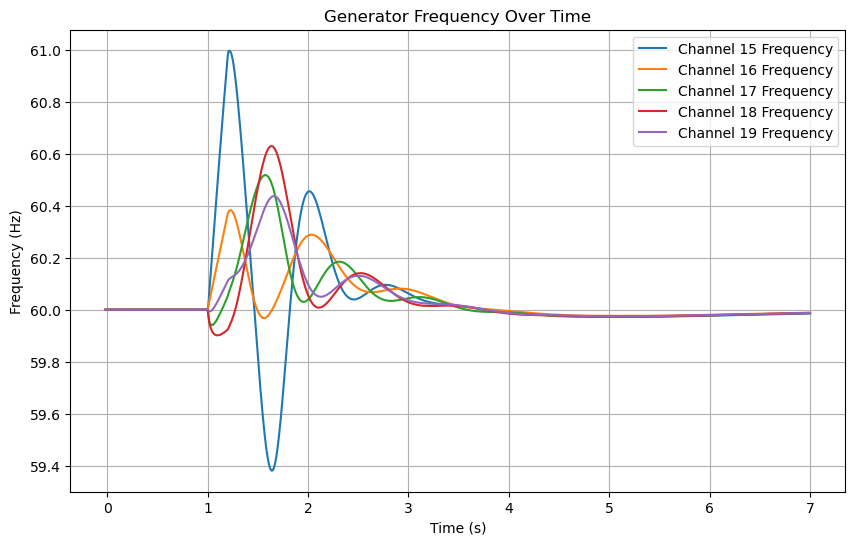

In [4]:
# PSS/E dynamic simulation

solved_case = "solved_case.sav"
output_file = "./simulation_output_file.out"

# Load case and dynamic data, solve power flow
psspy.read(1, case_raw_path)
psspy.dyre_new(dyrefile=case_dyr_path)
psspy.fnsl()
psspy.save(solved_case)

# Setup for dynamic simulation
psspy.cong(0)
psspy.ordr(0)
psspy.fact()
psspy.tysl(0)

# Add channels (e.g., bus voltage, machine speed)
psspy.chsb(sid=0, all=1, status=[-1, -1, -1, 1, 13, 0])  # Bus voltage
psspy.chsb(sid=0, all=1, status=[-1, -1, -1, 1, 7, 0])  # Machine speed
psspy.chsb(sid=0, all=1, status=[-1, -1, -1, 1, 1, 0])  # ANGLE
psspy.chsb(sid=0, all=1, status=[-1, -1, -1, 1, 12, 0])  # bus freq


# # Start recording to output file and run dynamic simulation
psspy.strt_2(outfile=output_file, snapfile=solved_case, outint="0.001")
psspy.run(tpause=1)
psspy.dist_bus_fault(ibus=2, string="", basekv=0, busfrac=1.0, r=0.0, x=0.0)
time = 1.2
psspy.run(tpause=time)
psspy.dist_clear_fault(1)
time = 7
psspy.run(tpause=time)

psspy.save("final_state_after_dynamic_sim.sav")
psspy.save(solved_case)
psse_plot = plot_simulation_results(output_file, channels=[15, 16, 17, 18, 19])


# Channel 15 - spd Bus 1
# Channel 16 - spd Bus 2
# Channel 17 - spd Bus 3
# Channel 18 - spd Bus 8
# Channel 19 - spd Bus 8

In [5]:
if os.path.exists(output_file):
    print("deleted output file")
    os.remove(output_file)
if os.path.exists(solved_case):
    print("deleted solved case file")
    os.remove(solved_case)

deleted output file
deleted solved case file


In [11]:
chnf_obj = dyntools.CHNF(output_file)
_, channel_ids, channel_data = chnf_obj.get_data()

In [12]:
channel_ids

OrderedDict([('time', 'Time(s)'),
             (1, 'VOLT 1 [BUS1 69.000]'),
             (2, 'VOLT 2 [BUS2 69.000]'),
             (3, 'VOLT 3 [BUS3 69.000]'),
             (4, 'VOLT 4 [BUS4 69.000]'),
             (5, 'VOLT 5 [BUS5 69.000]'),
             (6, 'VOLT 6 [BUS6 138.00]'),
             (7, 'VOLT 7 [BUS7 138.00]'),
             (8, 'VOLT 8 [BUS8 69.000]'),
             (9, 'VOLT 9 [BUS9 138.00]'),
             (10, 'VOLT 10 [BUS10 138.00]'),
             (11, 'VOLT 11 [BUS11 138.00]'),
             (12, 'VOLT 12 [BUS12 138.00]'),
             (13, 'VOLT 13 [BUS13 138.00]'),
             (14, 'VOLT 14 [BUS14 138.00]'),
             (15, 'SPD 1[BUS1 69.000]1'),
             (16, 'SPD 2[BUS2 69.000]1'),
             (17, 'SPD 3[BUS3 69.000]1'),
             (18, 'SPD 6[BUS6 138.00]1'),
             (19, 'SPD 8[BUS8 69.000]1'),
             (20, 'ANGL 1[BUS1 69.000]1'),
             (21, 'ANGL 2[BUS2 69.000]1'),
             (22, 'ANGL 3[BUS3 69.000]1'),
             (23, 'ANGL 

In [ ]:
[139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150]
129, 130, 131, 132, 133
63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
list(range(63, 76))

In [10]:
list(range(63, 77))

[63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]

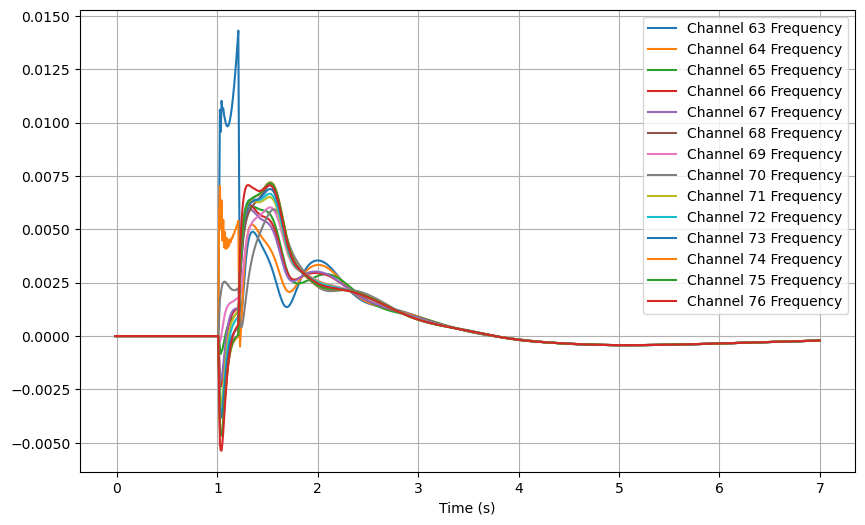

<module 'matplotlib.pyplot' from 'c:\\Users\\alexb\\miniconda3\\envs\\PSSe\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [11]:
def plot_temp(output_file, channels):
    chnf_obj = dyntools.CHNF(output_file)
    _, channel_ids, channel_data = chnf_obj.get_data()
    base_frequency = 60.0  # Hz

    plt.figure(figsize=(10, 6))

    # Assuming channels for generator frequencies are correctly numbered

    for ch in channels:
        frequency_deviation = np.array(channel_data[ch])
        time_array = np.array(channel_data["time"])
        actual_frequency = frequency_deviation  # 60.0 * (1 + frequency_deviation)

        plt.plot(time_array, actual_frequency, label=f"Channel {ch} Frequency")

    plt.xlabel("Time (s)")
    plt.legend()
    plt.grid(True)
    # plt.ylim(59.96, 60.012)
    plt.show()
    return plt


plot_temp(output_file, channels=list(range(63, 77)))

In [ ]:
# the way the fault could be different!!, y-bus change... impedance change
# figure out how to fix the step size in ANDES - source code

In [5]:
def extract_psse_data_to_df(output_file, channels):
    chnf_obj = dyntools.CHNF(output_file)
    _, channel_ids, channel_data = chnf_obj.get_data()
    base_frequency = 60.0  # Base frequency in Hz

    # Initialize a dictionary to hold data for DataFrame
    data_dict = {}

    # Extract time array (assuming 'time' is the key for time data in channel_data)
    time_array = np.array(channel_data["time"])
    data_dict["Timestamp"] = time_array

    # Loop through the specified channels to extract frequency data
    for ch in channels:
        if ch in channel_data:
            # Assuming the data represents frequency deviations, calculate actual frequency
            frequency_deviation = np.array(channel_data[ch])
            actual_frequency = base_frequency * (1 + frequency_deviation)
            data_dict[f"Generator_{ch}_Frequency"] = actual_frequency
        else:
            print(f"Channel {ch} not found in the output data.")

    # Create a DataFrame from the dictionary
    gen_data_df_psse = pd.DataFrame(data_dict)

    return gen_data_df_psse

In [13]:
output_file = "./simulation_output_file.out"
psse_df = extract_psse_data_to_df(output_file, channels=[15, 16, 17, 18, 19])
psse_df

,Timestamp,Generator_15_Frequency,Generator_16_Frequency,Generator_17_Frequency,Generator_18_Frequency,Generator_19_Frequency
0,-0.016667,60.000000,60.000000,60.000000,60.000000,60.000000
1,-0.008333,60.000000,60.000000,60.000000,60.000000,60.000000
2,0.000000,60.000000,60.000000,60.000000,60.000000,60.000000
3,0.008333,60.000000,60.000000,60.000000,60.000000,60.000000
4,0.016667,60.000000,60.000000,60.000000,60.000000,60.000000
...,...,...,...,...,...,...
840,6.966646,59.985129,59.988237,59.986784,59.986909,59.987492
841,6.974979,59.985195,59.988299,59.986850,59.986975,59.987556
842,6.983313,59.985261,59.988361,59.986916,59.987040,59.987619
843,6.991646,59.985327,59.988422,59.986981,59.987106,59.987682


In [7]:
andes_df = pd.read_csv("andes_dynamic_simulation.csv")
andes_df

,Unnamed: 0,Timestamp,Generator_1_Freq,Generator_2_Freq,Generator_3_Freq,Generator_4_Freq,Generator_5_Freq
0,0,0.000000,60.000000,60.000000,60.000000,60.000000,60.000000
1,1,0.033333,60.000000,60.000000,60.000000,60.000000,60.000000
2,2,0.066667,60.000000,60.000000,60.000000,60.000000,60.000000
3,3,0.100000,60.000000,60.000000,60.000000,60.000000,60.000000
4,4,0.133333,60.000000,60.000000,60.000000,60.000000,60.000000
...,...,...,...,...,...,...,...
214,214,6.893275,60.009370,60.012659,60.010214,60.010724,60.011350
215,215,6.926608,60.009090,60.012372,60.010003,60.010438,60.011073
216,216,6.959942,60.008815,60.012091,60.009796,60.010158,60.010797
217,217,6.993275,60.008544,60.011815,60.009590,60.009883,60.010521


In [9]:
psse_df

,Timestamp
0,-0.016667
1,-0.008333
2,0.000000
3,0.008333
4,0.016667
...,...
840,6.966646
841,6.974979
842,6.983313
843,6.991646


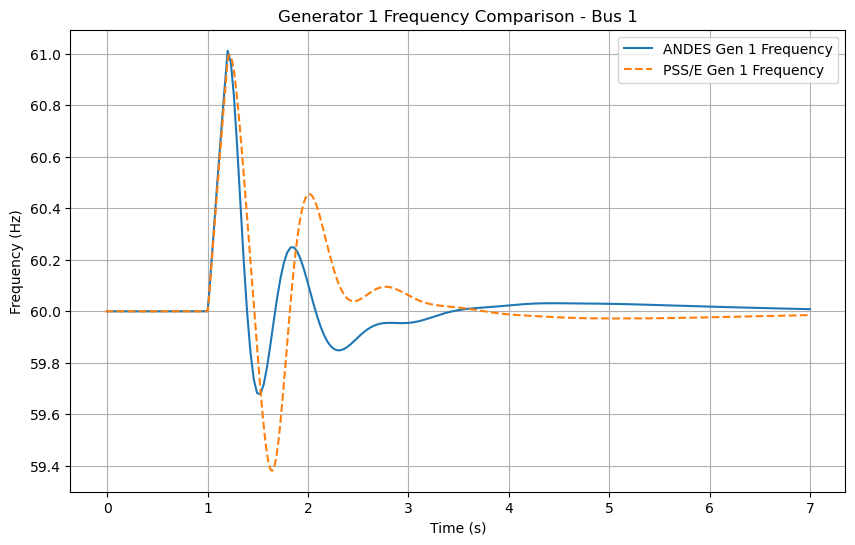

In [14]:
import matplotlib.pyplot as plt

# Plotting Generator 1 Frequency from both ANDES and PSS/E
plt.figure(figsize=(10, 6))

# Plot ANDES Generator 1 Frequency
plt.plot(
    andes_df["Timestamp"],
    andes_df["Generator_1_Freq"],
    label="ANDES Gen 1 Frequency",
    linestyle="-",
    marker="",
)

# Plot PSS/E Generator 1 Frequency
plt.plot(
    psse_df["Timestamp"],
    psse_df["Generator_15_Frequency"],
    label="PSS/E Gen 1 Frequency",
    linestyle="--",
    marker="",
)

plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Generator 1 Frequency Comparison - Bus 1")
plt.legend()
plt.grid(True)
plt.show()

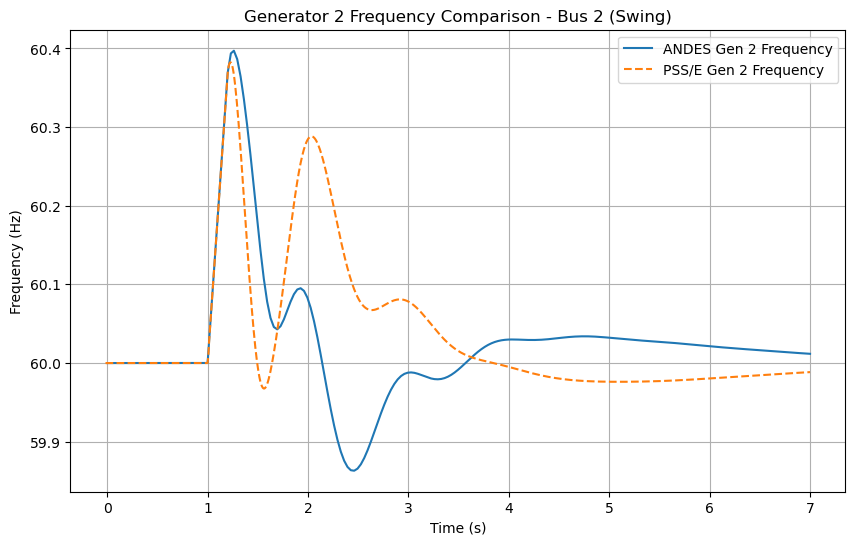

In [12]:
# Plotting Generator 1 Frequency from both ANDES and PSS/E
plt.figure(figsize=(10, 6))

# Plot ANDES Generator 1 Frequency
plt.plot(
    andes_df["Timestamp"],
    andes_df["Generator_2_Freq"],
    label="ANDES Gen 2 Frequency",
    linestyle="-",
    marker="",
)

# Plot PSS/E Generator 1 Frequency
plt.plot(
    psse_df["Timestamp"],
    psse_df["Generator_16_Frequency"],
    label="PSS/E Gen 2 Frequency",
    linestyle="--",
    marker="",
)

plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Generator 2 Frequency Comparison - Bus 2 (Swing)")
plt.legend()
plt.grid(True)
plt.show()

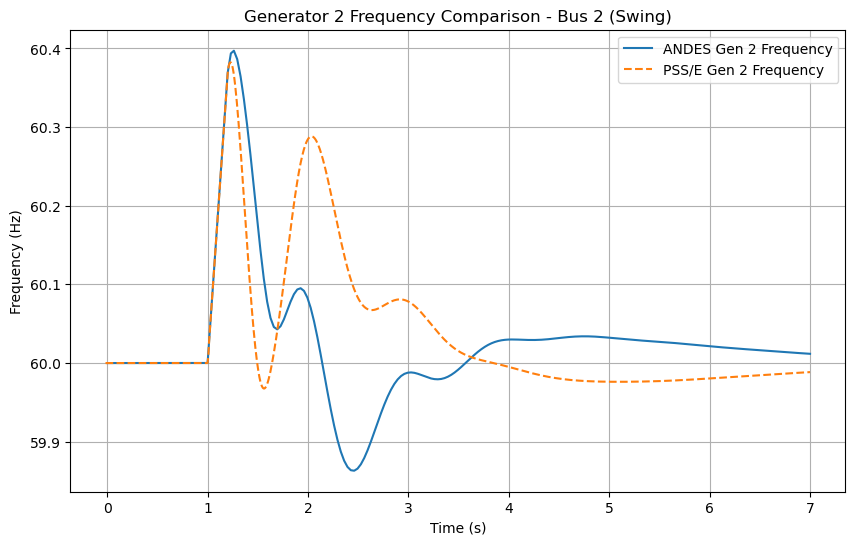

In [15]:
# Plotting Generator 1 Frequency from both ANDES and PSS/E
plt.figure(figsize=(10, 6))

# Plot ANDES Generator 1 Frequency
plt.plot(
    andes_df["Timestamp"],
    andes_df["Generator_2_Freq"],
    label="ANDES Gen 2 Frequency",
    linestyle="-",
    marker="",
)

# Plot PSS/E Generator 1 Frequency
plt.plot(
    psse_df["Timestamp"],
    psse_df["Generator_16_Frequency"],
    label="PSS/E Gen 2 Frequency",
    linestyle="--",
    marker="",
)

plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Generator 2 Frequency Comparison - Bus 2 (Swing)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# tune gov model? list out the governor models in PSS/E and ANDES

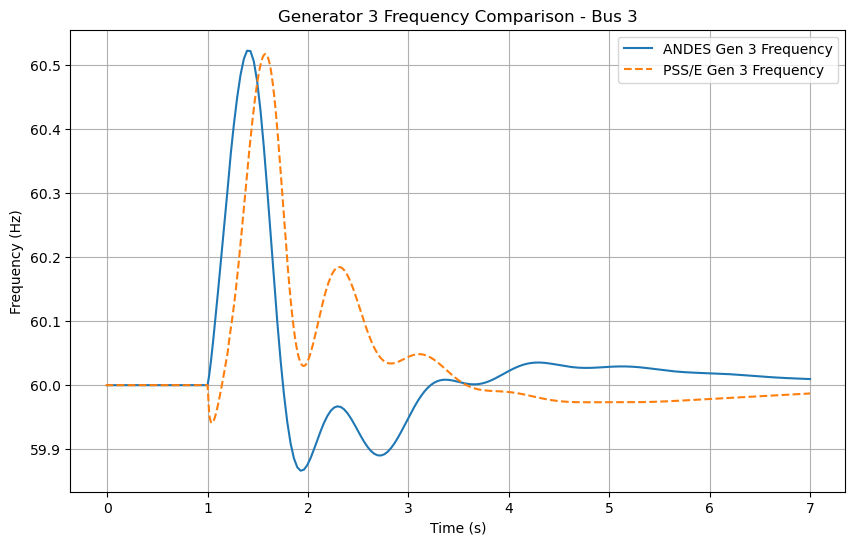

In [13]:
# Plotting Generator 1 Frequency from both ANDES and PSS/E
plt.figure(figsize=(10, 6))

# Plot ANDES Generator 1 Frequency
plt.plot(
    andes_df["Timestamp"],
    andes_df["Generator_3_Freq"],
    label="ANDES Gen 3 Frequency",
    linestyle="-",
    marker="",
)

# Plot PSS/E Generator 1 Frequency
plt.plot(
    psse_df["Timestamp"],
    psse_df["Generator_17_Frequency"],
    label="PSS/E Gen 3 Frequency",
    linestyle="--",
    marker="",
)

plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Generator 3 Frequency Comparison - Bus 3")
plt.legend()
plt.grid(True)
plt.show()

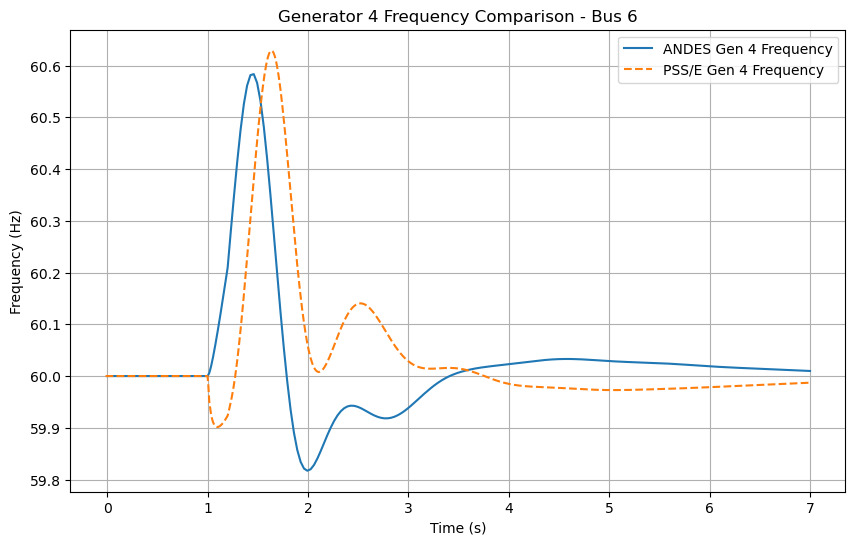

In [14]:
# Plotting Generator 1 Frequency from both ANDES and PSS/E
plt.figure(figsize=(10, 6))

# Plot ANDES Generator 1 Frequency
plt.plot(
    andes_df["Timestamp"],
    andes_df["Generator_4_Freq"],
    label="ANDES Gen 4 Frequency",
    linestyle="-",
    marker="",
)

# Plot PSS/E Generator 1 Frequency
plt.plot(
    psse_df["Timestamp"],
    psse_df["Generator_18_Frequency"],
    label="PSS/E Gen 4 Frequency",
    linestyle="--",
    marker="",
)

plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Generator 4 Frequency Comparison - Bus 6")
plt.legend()
plt.grid(True)
plt.show()

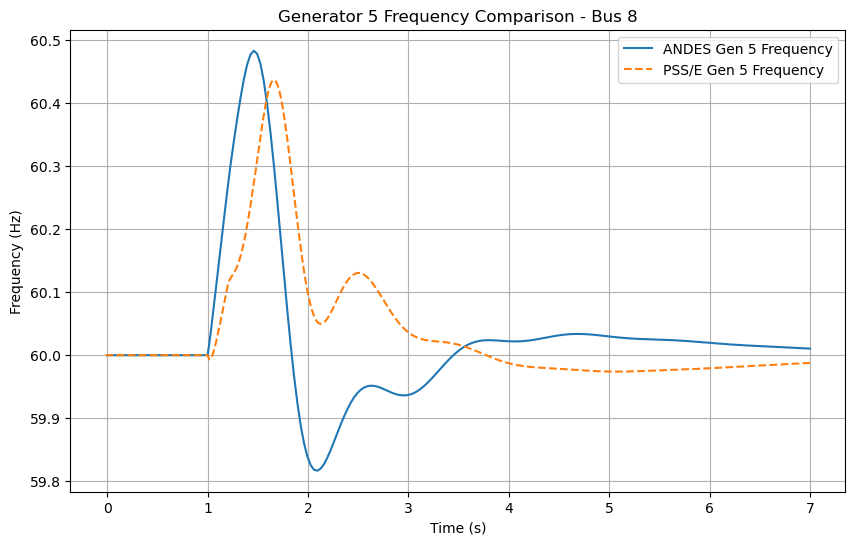

In [15]:
# Plotting Generator 1 Frequency from both ANDES and PSS/E
plt.figure(figsize=(10, 6))

# Plot ANDES Generator 1 Frequency
plt.plot(
    andes_df["Timestamp"],
    andes_df["Generator_5_Freq"],
    label="ANDES Gen 5 Frequency",
    linestyle="-",
    marker="",
)

# Plot PSS/E Generator 1 Frequency
plt.plot(
    psse_df["Timestamp"],
    psse_df["Generator_19_Frequency"],
    label="PSS/E Gen 5 Frequency",
    linestyle="--",
    marker="",
)

plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Generator 5 Frequency Comparison - Bus 8")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
""" 
Still not sure whats going on,

* PSS/E has a high resoluation sim 

ideas:
    - find system inertia
    - different governor models implementation (same files)
    
    
pull up the governer parameter documentation for PSS/E and ANDES,
repalce with simple governor models?
tune the governor models in PSS/E and ANDES to be simple as possible?
same exciter 

apply to limters - gov?
    - find the limiter parameters in PSS/E and ANDES
    - increase to huge value
    

"""

' \nStill not sure whats going on,\n\n* PSS/E has a high resoluation sim \n\nideas:\n    - find system inertia\n    - different governor models implementation (same files)\n\n'